In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import numpy as np
import time
# gpu_option = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.session(config=tf.ConfigProto(gpu_options=gpu_option))

In [2]:
X_Train = pickle.load(open("X_Train.pickle","rb"))
y_Train = pickle.load(open("Y_train.pickle","rb"))
X_Train = X_Train/255.0
X_Train = np.array(X_Train)
y_Train = np.array(y_Train)


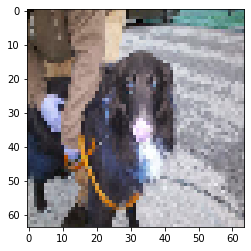

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_Train[0])
plt.show()
# X_Train[2].shape

In [8]:
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3,4]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            tensorboard = TensorBoard(log_dir="logs\\{}".format(NAME))
            print(NAME)
            model = Sequential()
            
            model.add(Conv2D(layer_size, (3,3), input_shape = (64,64,3)))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size)) 
                model.add(Activation("relu"))
            

            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                         metrics=['accuracy'])

            model.fit(X_Train, y_Train, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1614527633
Train on 5600 samples, validate on 2400 samples
Epoch 1/10
5600/5600 [==============================] - 6s 986us/sample - loss: 0.6608 - accuracy: 0.5975 - val_loss: 0.6159 - val_accuracy: 0.6733
Epoch 2/10
5600/5600 [==============================] - 2s 288us/sample - loss: 0.5740 - accuracy: 0.7021 - val_loss: 0.5916 - val_accuracy: 0.6979
Epoch 3/10
5600/5600 [==============================] - 2s 293us/sample - loss: 0.5138 - accuracy: 0.7466 - val_loss: 0.5622 - val_accuracy: 0.7179
Epoch 4/10
5600/5600 [==============================] - 2s 349us/sample - loss: 0.4624 - accuracy: 0.7805 - val_loss: 0.5850 - val_accuracy: 0.6992
Epoch 5/10
5600/5600 [==============================] - 2s 325us/sample - loss: 0.4165 - accuracy: 0.8134 - val_loss: 0.5734 - val_accuracy: 0.7163
Epoch 6/10
5600/5600 [==============================] - 2s 331us/sample - loss: 0.3814 - accuracy: 0.8311 - val_loss: 0.6538 - val_accuracy: 0.6767
Epoch 7/10
5600/5600 [=======

Epoch 3/10
5600/5600 [==============================] - 2s 418us/sample - loss: 0.5412 - accuracy: 0.7259 - val_loss: 0.5427 - val_accuracy: 0.7262
Epoch 4/10
5600/5600 [==============================] - 2s 419us/sample - loss: 0.5028 - accuracy: 0.7538 - val_loss: 0.5305 - val_accuracy: 0.7408
Epoch 5/10
5600/5600 [==============================] - 2s 415us/sample - loss: 0.4618 - accuracy: 0.7829 - val_loss: 0.5164 - val_accuracy: 0.7446
Epoch 6/10
5600/5600 [==============================] - 2s 418us/sample - loss: 0.4359 - accuracy: 0.7998 - val_loss: 0.5264 - val_accuracy: 0.7467
Epoch 7/10
5600/5600 [==============================] - 2s 414us/sample - loss: 0.4066 - accuracy: 0.8145 - val_loss: 0.5143 - val_accuracy: 0.7496
Epoch 8/10
5600/5600 [==============================] - 2s 417us/sample - loss: 0.3735 - accuracy: 0.8296 - val_loss: 0.5203 - val_accuracy: 0.7546
Epoch 9/10
5600/5600 [==============================] - 2s 423us/sample - loss: 0.3438 - accuracy: 0.8509 - val_

5600/5600 [==============================] - 4s 697us/sample - loss: 0.4654 - accuracy: 0.7739 - val_loss: 0.5486 - val_accuracy: 0.7283
Epoch 6/10
5600/5600 [==============================] - 4s 698us/sample - loss: 0.4318 - accuracy: 0.8027 - val_loss: 0.4701 - val_accuracy: 0.7767
Epoch 7/10
5600/5600 [==============================] - 4s 699us/sample - loss: 0.3849 - accuracy: 0.8270 - val_loss: 0.5088 - val_accuracy: 0.7604
Epoch 8/10
5600/5600 [==============================] - 4s 700us/sample - loss: 0.3464 - accuracy: 0.8482 - val_loss: 0.4671 - val_accuracy: 0.7837
Epoch 9/10
5600/5600 [==============================] - 4s 699us/sample - loss: 0.3131 - accuracy: 0.8664 - val_loss: 0.4871 - val_accuracy: 0.7908
Epoch 10/10
5600/5600 [==============================] - 4s 701us/sample - loss: 0.2696 - accuracy: 0.8830 - val_loss: 0.5475 - val_accuracy: 0.7763
4-conv-128-nodes-0-dense-1614527915
Train on 5600 samples, validate on 2400 samples
Epoch 1/10
5600/5600 [================

5600/5600 [==============================] - 2s 325us/sample - loss: 0.4453 - accuracy: 0.7962 - val_loss: 0.4955 - val_accuracy: 0.7538
Epoch 8/10
5600/5600 [==============================] - 2s 319us/sample - loss: 0.4106 - accuracy: 0.8141 - val_loss: 0.5447 - val_accuracy: 0.7429
Epoch 9/10
5600/5600 [==============================] - 2s 321us/sample - loss: 0.3701 - accuracy: 0.8361 - val_loss: 0.4923 - val_accuracy: 0.7754
Epoch 10/10
5600/5600 [==============================] - 2s 316us/sample - loss: 0.3246 - accuracy: 0.8587 - val_loss: 0.5046 - val_accuracy: 0.7667
1-conv-64-nodes-1-dense-1614528031
Train on 5600 samples, validate on 2400 samples
Epoch 1/10
5600/5600 [==============================] - 3s 469us/sample - loss: 0.7532 - accuracy: 0.5007 - val_loss: 0.6929 - val_accuracy: 0.5058
Epoch 2/10
5600/5600 [==============================] - 2s 392us/sample - loss: 0.6874 - accuracy: 0.5375 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 3/10
5600/5600 [=================

5600/5600 [==============================] - 4s 664us/sample - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4996
Epoch 10/10
5600/5600 [==============================] - 4s 666us/sample - loss: 0.6932 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.5004
2-conv-128-nodes-1-dense-1614528170
Train on 5600 samples, validate on 2400 samples
Epoch 1/10
5600/5600 [==============================] - 4s 797us/sample - loss: 0.6992 - accuracy: 0.5109 - val_loss: 0.6780 - val_accuracy: 0.5713
Epoch 2/10
5600/5600 [==============================] - 4s 701us/sample - loss: 0.6591 - accuracy: 0.5964 - val_loss: 0.6112 - val_accuracy: 0.6800
Epoch 3/10
5600/5600 [==============================] - 4s 702us/sample - loss: 0.6156 - accuracy: 0.6571 - val_loss: 0.6306 - val_accuracy: 0.6554
Epoch 4/10
5600/5600 [==============================] - 4s 704us/sample - loss: 0.5653 - accuracy: 0.6988 - val_loss: 0.5694 - val_accuracy: 0.7058
Epoch 5/10
5600/5600 [================

5600/5600 [==============================] - 2s 434us/sample - loss: 0.6933 - accuracy: 0.5184 - val_loss: 0.6919 - val_accuracy: 0.5283
Epoch 2/10
5600/5600 [==============================] - 2s 316us/sample - loss: 0.6804 - accuracy: 0.5654 - val_loss: 0.6682 - val_accuracy: 0.5817
Epoch 3/10
5600/5600 [==============================] - 2s 316us/sample - loss: 0.6196 - accuracy: 0.6543 - val_loss: 0.6063 - val_accuracy: 0.6612
Epoch 4/10
5600/5600 [==============================] - 2s 318us/sample - loss: 0.5776 - accuracy: 0.6945 - val_loss: 0.6032 - val_accuracy: 0.6717
Epoch 5/10
5600/5600 [==============================] - 2s 322us/sample - loss: 0.5294 - accuracy: 0.7307 - val_loss: 0.5243 - val_accuracy: 0.7450
Epoch 6/10
5600/5600 [==============================] - 2s 318us/sample - loss: 0.4830 - accuracy: 0.7618 - val_loss: 0.5120 - val_accuracy: 0.7558
Epoch 7/10
5600/5600 [==============================] - 2s 316us/sample - loss: 0.4469 - accuracy: 0.7880 - val_loss: 0.501

5600/5600 [==============================] - 2s 444us/sample - loss: 0.5805 - accuracy: 0.6964 - val_loss: 0.5607 - val_accuracy: 0.7104
Epoch 4/10
5600/5600 [==============================] - 3s 450us/sample - loss: 0.5392 - accuracy: 0.7262 - val_loss: 0.5245 - val_accuracy: 0.7317
Epoch 5/10
5600/5600 [==============================] - 2s 446us/sample - loss: 0.4944 - accuracy: 0.7600 - val_loss: 0.5190 - val_accuracy: 0.7604
Epoch 6/10
5600/5600 [==============================] - 2s 446us/sample - loss: 0.4448 - accuracy: 0.7895 - val_loss: 0.5598 - val_accuracy: 0.7396
Epoch 7/10
5600/5600 [==============================] - 2s 444us/sample - loss: 0.3886 - accuracy: 0.8225 - val_loss: 0.5260 - val_accuracy: 0.7483
Epoch 8/10
5600/5600 [==============================] - 3s 451us/sample - loss: 0.3306 - accuracy: 0.8573 - val_loss: 0.4935 - val_accuracy: 0.7663
Epoch 9/10
5600/5600 [==============================] - 3s 447us/sample - loss: 0.2773 - accuracy: 0.8771 - val_loss: 0.554

In [9]:
import os
logs_base_dir = './logs'
os.makedirs(logs_base_dir, exist_ok=True)
%load_ext tensorboard
%tensorboard --logdir {logs_base_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 10292.